# Chrissy Taylor  -  Venice Airbnb Analysis  -  

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

### Read in CSV file, then check dataframe

In [2]:
venice_df = pd.read_csv('data/listings.csv', low_memory = False)
venice_df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6623,https://www.airbnb.com/rooms/6623,20221205143515,2022-12-05,city scrape,Venice Blue on Canal apartment,"I'm thrilled to share my ""Blue on Venice Canal...",Close by is the Frari Church (known as Tiziano...,https://a0.muscache.com/pictures/492258/834683...,15016,...,4.85,4.96,4.92,NaN,f,3,3,0,0,1.12
1,6624,https://www.airbnb.com/rooms/6624,20221205143515,2022-12-05,city scrape,Venice garden charme and canal view!,I'm thrilled to share my apartment with garden...,We are in the middle of a residential area cal...,https://a0.muscache.com/pictures/65440024/a564...,15016,...,4.87,4.95,4.92,NaN,f,3,3,0,0,0.59
2,12074,https://www.airbnb.com/rooms/12074,20221205143515,2022-12-05,city scrape,Venice home to relax and emotions,I'm thrilled to share my home to guests coming...,"There are plenty of bars, restaurants and pizz...",https://a0.muscache.com/pictures/11646330/65e7...,15016,...,4.88,4.89,4.89,NaN,f,3,3,0,0,1.31
3,27116,https://www.airbnb.com/rooms/27116,20221205143515,2022-12-05,city scrape,Junior Suite with balcony overlooking canal,"Few steps from Saint Mark square, on a picture...","The area is very beautiful and characteristic,...",https://a0.muscache.com/pictures/miso/Hosting-...,116144,...,4.81,4.94,4.78,NaN,t,2,0,2,0,2.77
4,44527,https://www.airbnb.com/rooms/44527,20221205143515,2022-12-05,city scrape,Historical Luxury Apartment on Calm Sunny Canal,Descend a spiral staircase to discover an apar...,"Cannaregio is a well-connected, truly Venetian...",https://a0.muscache.com/pictures/c35b6820-04d3...,120215,...,4.95,4.88,4.65,M0270422294,f,1,1,0,0,0.71


## Data Cleaning
- dropping unneeded columns
- rename columns, fix data type
- special characters (remove or replace?)
- drop duplicate values
- check for null values (remove or replace?)

In [3]:
# Look at name, datatype, and quantity of columns
venice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7275 entries, 0 to 7274
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7275 non-null   int64  
 1   listing_url                                   7275 non-null   object 
 2   scrape_id                                     7275 non-null   int64  
 3   last_scraped                                  7275 non-null   object 
 4   source                                        7275 non-null   object 
 5   name                                          7275 non-null   object 
 6   description                                   7169 non-null   object 
 7   neighborhood_overview                         4596 non-null   object 
 8   picture_url                                   7275 non-null   object 
 9   host_id                                       7275 non-null   i

## 7275 rows, 74 columns in total.

In [5]:
# dropping irrelevant columns in new dataframe, in case I need to go back for dropped data later
cut_df = venice_df.drop(columns = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 
       'host_url', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_thumbnail_url', 'host_picture_url',
       'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'license', 'reviews_per_month'])
cut_df

,id,host_id,host_name,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,6623,15016,Francesca,t,San Polo,10,16,San Polo,Isole,45.43817,...,4.99,4.89,4.85,4.96,4.92,f,3,3,0,0
1,6624,15016,Francesca,t,San Polo,10,16,Santa Croce,Isole,45.43977,...,4.96,4.94,4.87,4.95,4.92,f,3,3,0,0
2,12074,15016,Francesca,t,San Polo,10,16,San Polo,Isole,45.43896,...,4.98,4.89,4.88,4.89,4.89,f,3,3,0,0
3,27116,116144,Giò&Giò,f,San Marco,2,2,San Marco,Isole,45.43277,...,4.90,4.78,4.81,4.94,4.78,t,2,0,2,0
4,44527,120215,Marc & Elisabeth,t,Cannaregio,2,7,Cannaregio,Isole,45.44569,...,4.75,4.97,4.95,4.88,4.65,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7270,668596858876544127,468838035,Alloggi Barbaria,f,NaN,4,6,Castello,Isole,45.43911,...,5.00,5.00,5.00,5.00,5.00,f,4,0,4,0
7271,668624100482637049,52208767,Lorenzo,f,Lido,7,11,Lido,Isole,45.39741,...,4.86,5.00,5.00,5.00,4.86,t,6,6,0,0
7272,668648124476646048,173200514,Rent&Relax,t,San Polo,98,114,San Marco,Isole,45.43338,...,5.00,5.00,5.00,5.00,5.00,t,61,55,6,0
7273,668648293169522904,173200514,Rent&Relax,t,San Polo,98,114,San Marco,Isole,45.43252,...,5.00,5.00,5.00,5.00,5.00,t,61,55,6,0


## 7275 rows, 27 columns. 
* Nearly 2/3 columns dropped! 

In [7]:
# Renaming columns
cut_df = cut_df.rename(columns = {"calculated_host_listings_count" : "all_cnt", 
                                  "calculated_host_listings_count_entire_homes" : "entire_home_cnt", 
                                  "calculated_host_listings_count_private_rooms" : "private_rooms_cnt", 
                                  "calculated_host_listings_count_shared_rooms" : "shared_room_cnt", 
                                  "host_is_superhost" : "superhost_bool", 
                                  "instant_bookable" : "commercial_boolean"}) 

# Fixing datatype of price by replacing special characters , and $ in price before converting to float
cut_df = cut_df.replace("""\$""","""""", regex = True)
cut_df["price"] = cut_df["price"].replace("""\,""","""""", regex = True)
cut_df['price'] = cut_df['price'].astype(float)

# Confirm that datatype change worked
cut_df['price'].dtypes

dtype('float64')

## Removing Special Characters

In [37]:
# Looking at original neighbourhood names for troublesome characters, to start
print(cut_df.neighbourhood_cleansed.unique())

['San Polo' 'Santa Croce' 'San Marco' 'Cannaregio' 'Dorsoduro' 'Giudecca'
 'Castello' 'Villaggio San Marco' 'San Lorenzo XXV Aprile' 'Lido'
 'Tessera' 'Marghera' 'Santa Barbara' 'Favaro' 'Piave 1860' "Sant'Elena"
 'Malamocco' 'Murano' 'La Favorita' 'Alberoni' "Ca' Sabbioni" 'Campalto'
 'Marghera Catene' 'Pellestrina' 'Carpenedo' 'Cipressina' 'Bissuola'
 'Burano' 'Aeroporto' 'Marocco Terraglio' 'San Pietro in Volta'
 'Isola San Giorgio' 'Gazzera' 'Altobello' 'Zona Commerciale via Torino'
 'Chirignago' 'Campalto Gobbi' "Ca' Emiliani" 'Marghera Zona Industriale'
 'Villabona' 'Torcello' 'Campalto Bagaron' 'Mazzorbo' 'Villaggio Sartori'
 "Pra' Secco" 'Gatta - Bondu?' "Sant'Erasmo" 'Case Dosa' 'Dese'
 'Tronchetto' 'Sacca Fisola' 'Torre Antica' 'Quartiere Pertini' 'Zelarino'
 'Malcontenta' 'Campalto CEP' 'Molino Ronchin']


In [35]:
# Removing plenty of special characters, 
# but replacing the apostrophe joining words with a backtick to protect linguistic integrity of Italian names
Vdf = Vdf.replace('\?', '', regex = True)
Vdf = Vdf.replace("""\' """, """`""", regex = True)
Vdf = Vdf.replace("""\'""", """`""", regex = True)
Vdf = Vdf.replace("""&""", """ E """, regex = True)
Vdf = Vdf.replace("""\ò""", """o""", regex = True)
Vdf = Vdf.replace("""\ - """, """ e """, regex = True)
print(Vdf.neighbourhood_cleansed.unique())

['San Polo' 'Santa Croce' 'San Marco' 'Cannaregio' 'Dorsoduro' 'Giudecca'
 'Castello' 'Villaggio San Marco' 'San Lorenzo XXV Aprile' 'Lido'
 'Tessera' 'Marghera' 'Santa Barbara' 'Favaro' 'Piave 1860' 'Sant`Elena'
 'Malamocco' 'Murano' 'La Favorita' 'Alberoni' 'Ca`Sabbioni' 'Campalto'
 'Marghera Catene' 'Pellestrina' 'Carpenedo' 'Cipressina' 'Bissuola'
 'Burano' 'Aeroporto' 'Marocco Terraglio' 'San Pietro in Volta'
 'Isola San Giorgio' 'Gazzera' 'Altobello' 'Zona Commerciale via Torino'
 'Chirignago' 'Campalto Gobbi' 'Ca`Emiliani' 'Marghera Zona Industriale'
 'Villabona' 'Torcello' 'Campalto Bagaron' 'Mazzorbo' 'Villaggio Sartori'
 'Pra`Secco' 'Gatta e Bondu' 'Sant`Erasmo' 'Case Dosa' 'Dese' 'Tronchetto'
 'Sacca Fisola' 'Torre Antica' 'Quartiere Pertini' 'Zelarino'
 'Malcontenta' 'Campalto CEP' 'Molino Ronchin']


In [ ]:
# "Sant'Elena" became 'Sant`Elena' ,
# "Pra' Secco" became 'Pra`Secco' , etc
# to avoid changing the neighborhoud names beyond recognition.

## Check for Nulls & Duplicates

In [9]:
# Check for Duplicates
cut_df.duplicated().sum()
# no dupes! 

0

In [143]:
# Check for Null values
cut_df.isnull().sum()
# yes, there are plenty of null values. They're found in columns ['superhost_bool', 'host_neighbourhood'] and all columns regarding 'review_scores'

id                                 0
host_id                            0
host_name                          0
superhost_bool                    12
host_neighbourhood              3007
host_listings_count                0
host_total_listings_count          0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
price                              0
number_of_reviews                  0
review_scores_rating             658
review_scores_accuracy           671
review_scores_cleanliness        671
review_scores_checkin            671
review_scores_communication      670
review_scores_location           671
review_scores_value              671
commercial_boolean                 0
all_cnt                            0
entire_home_cnt                    0
private_rooms_cnt                  0
shared_room_cnt                    0
d

In [144]:
### Decided to drop the 2 host-characterization columns with nulls
Vdf = cut_df.drop(columns = ['superhost_bool', 'host_neighbourhood'])
Vdf.isnull().sum()

id                                0
host_id                           0
host_name                         0
host_listings_count               0
host_total_listings_count         0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
price                             0
number_of_reviews                 0
review_scores_rating            658
review_scores_accuracy          671
review_scores_cleanliness       671
review_scores_checkin           671
review_scores_communication     670
review_scores_location          671
review_scores_value             671
commercial_boolean                0
all_cnt                           0
entire_home_cnt                   0
private_rooms_cnt                 0
shared_room_cnt                   0
dtype: int64

In [18]:
# Investigating ~670 review_score nulls, are they only where listings have no reviews? 
reviews_df = Vdf[['id','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication','review_scores_location','review_scores_value']]
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7275 entries, 0 to 7274
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           7275 non-null   int64  
 1   number_of_reviews            7275 non-null   int64  
 2   review_scores_rating         6617 non-null   float64
 3   review_scores_accuracy       6604 non-null   float64
 4   review_scores_cleanliness    6604 non-null   float64
 5   review_scores_checkin        6604 non-null   float64
 6   review_scores_communication  6605 non-null   float64
 7   review_scores_location       6604 non-null   float64
 8   review_scores_value          6604 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 511.6 KB


In [152]:
null_scores = reviews_df[reviews_df['review_scores_location'].isna()]
print(null_scores)

                      id  number_of_reviews  review_scores_rating  \
79                352478                  0                   NaN   
198              1482860                  0                   NaN   
238              1780426                  0                   NaN   
467              3603203                  0                   NaN   
649              5084445                  0                   NaN   
...                  ...                ...                   ...   
7249  664566268338215615                  0                   NaN   
7250  664888510878921811                  0                   NaN   
7257  665119794776701299                  0                   NaN   
7268  667702716418352345                  0                   NaN   
7269  667916014910237086                  0                   NaN   

      review_scores_accuracy  review_scores_cleanliness  \
79                       NaN                        NaN   
198                      NaN                        N

In [30]:
# Taking a look at null review_scores with more than 0 reviews
print(null_scores[null_scores['number_of_reviews'] != 0])

            id  number_of_reviews  review_scores_rating  \
700    5489995                  1                   0.0   
1794  15765424                  1                   1.0   
2028  17801722                  2                   0.0   
2035  17836173                  1                   0.0   
2333  20550924                  1                   0.0   
2380  20872976                  1                   0.0   
2536  22224349                  1                   0.0   
2979  25440181                  1                   0.0   
3555  31615335                  1                   0.0   
3915  34195927                  1                   0.0   
4249  37878996                  3                   0.0   
4260  37978708                  1                   0.0   
4322  38691838                  2                   5.0   

      review_scores_accuracy  review_scores_cleanliness  \
700                      NaN                        NaN   
1794                     NaN                        NaN

Listings with Null 'review_scores...' have 0 reviews overall, or only have 1-3 reviews (and usually rated extremely low). The sole exception has 2 overall ratings for 5.0 but neither of those reviews completed detailed scoring - which calls into question their validity.

>  Decision: the Null values in 'review_scores..." signal an absence of reviews or reliable scoring data, so we will remove those entries when analyzing review trends.

# 

# What's important to Airbnb customers? 

## Which elements of review score  are most predictive of a listing's overall rating?


In [150]:
# creating a dataframe just for review score data (where we have them, dropping incomplete and null instances)
review_data = reviews_df.dropna()
review_data.describe()

,id,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,6.604000e+03,6604.000000,6604.000000,6604.000000,6604.000000,6604.000000,6604.000000,6604.000000,6604.000000
mean,8.790233e+16,84.099485,4.698736,4.763081,4.751373,4.805535,4.792394,4.842276,4.638434
std,2.203684e+17,107.221520,0.372252,0.347764,0.360375,0.311868,0.336406,0.242161,0.371809
min,6.623000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.398051e+07,13.000000,4.600000,4.710000,4.680000,4.750000,4.740000,4.800000,4.550000
50%,2.856113e+07,43.000000,4.800000,4.860000,4.860000,4.890000,4.890000,4.910000,4.730000
75%,4.819000e+07,114.000000,4.920000,4.950000,4.960000,4.970000,4.980000,4.970000,4.840000
max,7.673360e+17,1022.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


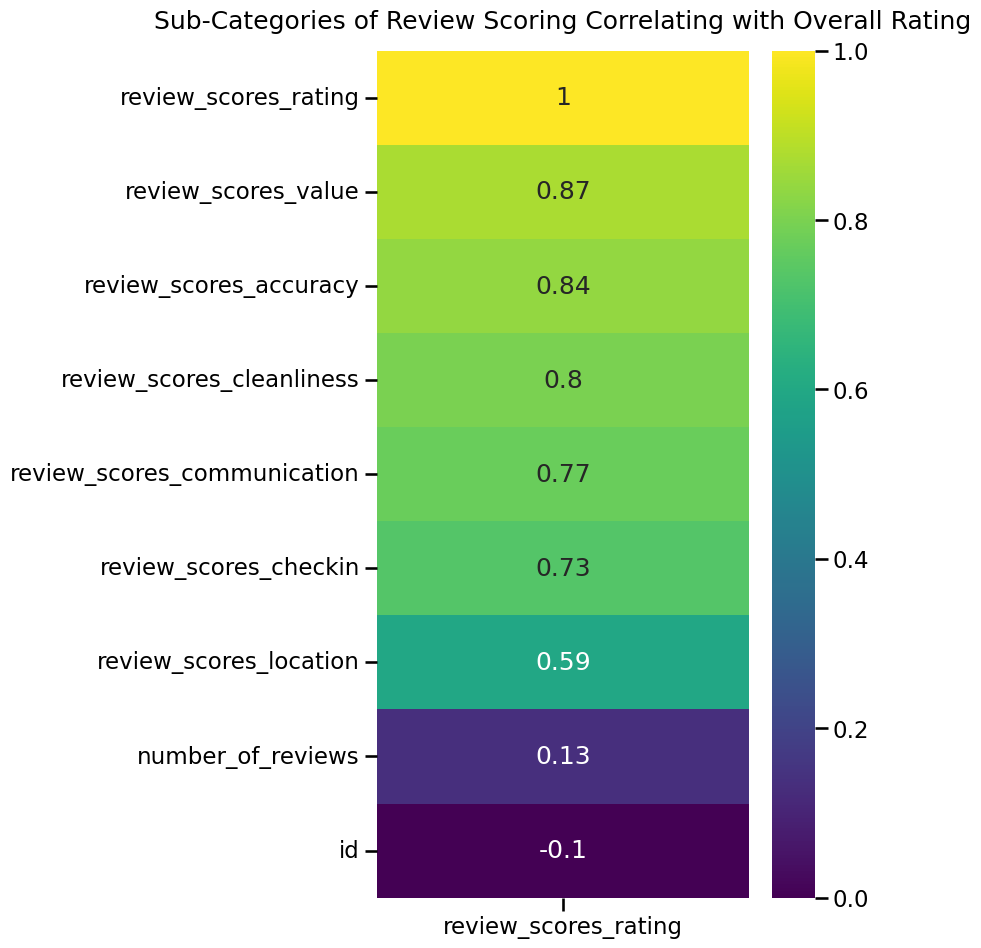

In [130]:
plt.figure(figsize=(6, 11))
sns.set_context("talk")
heatmap = sns.heatmap(reviews_df.corr()[['review_scores_rating']].sort_values(by='review_scores_rating', ascending=False), vmin=0, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Sub-Categories of Review Scoring Correlating with Overall Rating', fontdict={'fontsize':18}, pad=16);

It seems that value matters most, so let's look at pricing trends first:

In [145]:
# Looking at original neighbourhood names for troublesome characters, to start
print(cut_df.neighbourhood_cleansed.unique())

['San Polo' 'Santa Croce' 'San Marco' 'Cannaregio' 'Dorsoduro' 'Giudecca'
 'Castello' 'Villaggio San Marco' 'San Lorenzo XXV Aprile' 'Lido'
 'Tessera' 'Marghera' 'Santa Barbara' 'Favaro' 'Piave 1860' "Sant'Elena"
 'Malamocco' 'Murano' 'La Favorita' 'Alberoni' "Ca' Sabbioni" 'Campalto'
 'Marghera Catene' 'Pellestrina' 'Carpenedo' 'Cipressina' 'Bissuola'
 'Burano' 'Aeroporto' 'Marocco Terraglio' 'San Pietro in Volta'
 'Isola San Giorgio' 'Gazzera' 'Altobello' 'Zona Commerciale via Torino'
 'Chirignago' 'Campalto Gobbi' "Ca' Emiliani" 'Marghera Zona Industriale'
 'Villabona' 'Torcello' 'Campalto Bagaron' 'Mazzorbo' 'Villaggio Sartori'
 "Pra' Secco" 'Gatta - Bondu?' "Sant'Erasmo" 'Case Dosa' 'Dese'
 'Tronchetto' 'Sacca Fisola' 'Torre Antica' 'Quartiere Pertini' 'Zelarino'
 'Malcontenta' 'Campalto CEP' 'Molino Ronchin']


In [35]:
# Removing plenty of special characters, 
# but replacing the apostrophe joining words with a backtick to protect linguistic integrity of Italian names
Vdf = Vdf.replace('\?', '', regex = True)
Vdf = Vdf.replace("""\' """, """`""", regex = True)
Vdf = Vdf.replace("""\'""", """`""", regex = True)
Vdf = Vdf.replace("""&""", """ E """, regex = True)
Vdf = Vdf.replace("""\ò""", """o""", regex = True)
Vdf = Vdf.replace("""\ - """, """ e """, regex = True)
print(Vdf.neighbourhood_cleansed.unique())

['San Polo' 'Santa Croce' 'San Marco' 'Cannaregio' 'Dorsoduro' 'Giudecca'
 'Castello' 'Villaggio San Marco' 'San Lorenzo XXV Aprile' 'Lido'
 'Tessera' 'Marghera' 'Santa Barbara' 'Favaro' 'Piave 1860' 'Sant`Elena'
 'Malamocco' 'Murano' 'La Favorita' 'Alberoni' 'Ca`Sabbioni' 'Campalto'
 'Marghera Catene' 'Pellestrina' 'Carpenedo' 'Cipressina' 'Bissuola'
 'Burano' 'Aeroporto' 'Marocco Terraglio' 'San Pietro in Volta'
 'Isola San Giorgio' 'Gazzera' 'Altobello' 'Zona Commerciale via Torino'
 'Chirignago' 'Campalto Gobbi' 'Ca`Emiliani' 'Marghera Zona Industriale'
 'Villabona' 'Torcello' 'Campalto Bagaron' 'Mazzorbo' 'Villaggio Sartori'
 'Pra`Secco' 'Gatta e Bondu' 'Sant`Erasmo' 'Case Dosa' 'Dese' 'Tronchetto'
 'Sacca Fisola' 'Torre Antica' 'Quartiere Pertini' 'Zelarino'
 'Malcontenta' 'Campalto CEP' 'Molino Ronchin']


In [ ]:
# "Sant'Elena" became 'Sant`Elena' ,
# "Pra' Secco" became 'Pra`Secco' , etc
# to avoid changing the neighborhoud names beyond recognition.

## 
## What's the price range and supply of listings in each neighbourhood?
> Let's use Max, Min, Average, and Count of available Airbnbs

In [41]:
Where_df = pd.pivot_table(Vdf, index=('neighbourhood_cleansed'), values='price', aggfunc=('count', 'min', 'max', 'mean')).sort_values(by=['count'],ascending=False)      
print(Where_df)
Where_df.info()

                             count      max         mean    min
neighbourhood_cleansed                                         
Cannaregio                    1442   9999.0   163.968793   19.0
Castello                      1422   5292.0   191.744023   15.0
San Marco                      942   3000.0   229.015924    0.0
San Polo                       561   7500.0   205.846702   15.0
Dorsoduro                      546   3450.0   198.518315   15.0
Santa Croce                    539   8622.0   203.660482   20.0
Piave 1860                     480  22959.0   168.950000   21.0
Lido                           317   1500.0   162.772871   10.0
San Lorenzo XXV Aprile         161   1000.0    93.788820    0.0
Giudecca                       129   2700.0   174.976744   15.0
Marghera                       116   8499.0   221.008621   22.0
Murano                          72    230.0   123.069444   48.0
Carpenedo                       66    299.0    71.136364   11.0
Sant`Elena                      46    30

### 57 Neighborhoods with wide range of available supply and price:

### Minimum Price - $0 per night

### Maximum Price - $23,000 per night

This extreme price range seems unrealistic, let's look at distribution more closely for outliers to eliminate.

<AxesSubplot:ylabel='price'>

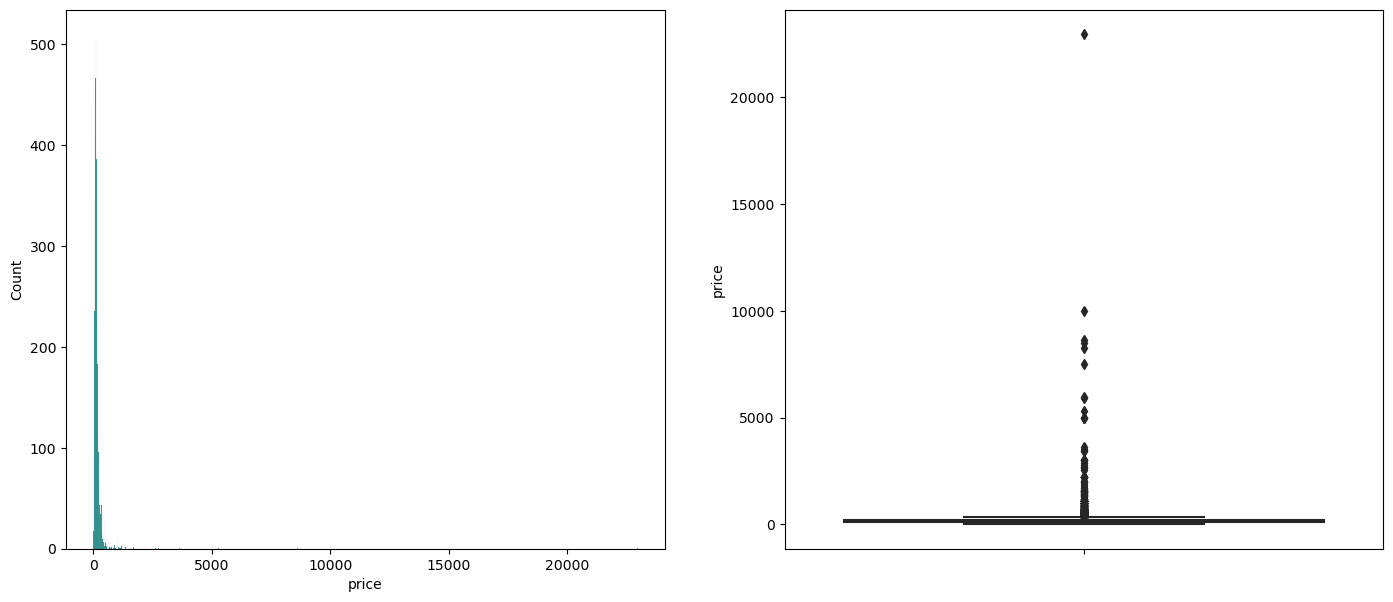

In [47]:
plt.style.use('default')
plt.rcParams["figure.figsize"] = (17,7)

fig, axs = plt.subplots(ncols=2)
sns.histplot(x = 'price' , color='teal', data = Vdf, ax=axs[0])
sns.boxplot(y = 'price', data = Vdf, color = 'green', ax=axs[1])

Observing a heavy skew towards bottom of price range,  but  $expensive$  outliers are pushing up the price range.

> Most listings priced below $1k 

>> but we see many listings above $5k, 

>>> one even exceding $20k!

## Investigating the URLs listed in original CSV file, I discover a shocking problem:

<img src="img/Slide10.png" width=600/>

## These are the $"expensive$ $outliers"$
## priced at 9 and 23 thousand USD per night

<img src="img/Slide9.png" width=600 />

## Whereas this lovely, luxurious hotel suite...

<img src="img/Slide8.png" width=900 />

## ... is listed in the dataset at $0.00 per night

Although the live URL links list the hotel rooms at more reasonable prices, but we don't have time to manually check the price accuracy of every entry.


## Interquartile Range
Since the IQR is simply the range of the middle 50% of data values, it’s not affected by extreme outliers. 

It's the perfect tool for this job!

In [50]:
# Finding the 25th percentile of pricerange
Vdf.price.quantile(q=.25)

90.0

In [51]:
# Finding the 75th percentile of pricerange
Vdf.price.quantile(q=.5)

128.0

In [113]:
IQR_df = Vdf.query("price >= 90 and price <= 128")

Adjusted Price Range of Dataset is 90.00 to 128.00
> A price range of only $40 will exclude a TON of data, and doesn't seem terribly realistic.

## But then I remembered!


<img src="img/Slide6.png" width=500 />
    
### Dataset has Neighborhood Groups to characterize the 50+ Neighbourhoods, similar to NYC's use of five Boroughs. 

### We can use the two groups to split the listings by location data into two distinct populations:


<img src="img/Slide7.png" width=650 />

# Island $(Isole)$  vs  Mainland $(Terraferma)$

In [57]:
isle_pivT = pd.pivot_table(Vdf, index='neighbourhood_group_cleansed', values='price', aggfunc = ('mean', 'count', 'max', 'min'))      
isle_pivT

,count,max,mean,min
neighbourhood_group_cleansed,,,,
Isole,6121,9999.0,190.145238,0.0
Terraferma,1154,22959.0,154.192374,0.0


### Island vs Mainland  Comparison:
- Isole (Island) group has 5 times more listings than Terraferma (Mainland) group - a difference of more than 5k listings!
- Average price of two groups differs by approximately $40
- Both have extreme price outliers, max and min.

### I think the two groups are different enough to warrant splitting into distinct populations for comparison.

In [58]:
Isole_df = Vdf[Vdf.neighbourhood_group_cleansed == 'Isole']
Isole_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6121 entries, 0 to 7274
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            6121 non-null   int64  
 1   host_id                       6121 non-null   int64  
 2   host_name                     6121 non-null   object 
 3   host_listings_count           6121 non-null   int64  
 4   host_total_listings_count     6121 non-null   int64  
 5   neighbourhood_cleansed        6121 non-null   object 
 6   neighbourhood_group_cleansed  6121 non-null   object 
 7   latitude                      6121 non-null   float64
 8   longitude                     6121 non-null   float64
 9   property_type                 6121 non-null   object 
 10  room_type                     6121 non-null   object 
 11  price                         6121 non-null   float64
 12  number_of_reviews             6121 non-null   int64  
 13  rev

In [59]:
Terra_df = Vdf[Vdf.neighbourhood_group_cleansed == 'Terraferma']
Terra_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 20 to 7265
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            1154 non-null   int64  
 1   host_id                       1154 non-null   int64  
 2   host_name                     1154 non-null   object 
 3   host_listings_count           1154 non-null   int64  
 4   host_total_listings_count     1154 non-null   int64  
 5   neighbourhood_cleansed        1154 non-null   object 
 6   neighbourhood_group_cleansed  1154 non-null   object 
 7   latitude                      1154 non-null   float64
 8   longitude                     1154 non-null   float64
 9   property_type                 1154 non-null   object 
 10  room_type                     1154 non-null   object 
 11  price                         1154 non-null   float64
 12  number_of_reviews             1154 non-null   int64  
 13  re

In [61]:
print("Island Adjusted Price Range is  ", Isole_df.price.quantile(q=.25)," to ", Isole_df.price.quantile(q=.75))
print("Mainland Adjusted Price Range is  ", Terra_df.price.quantile(q=.25)," to ", Terra_df.price.quantile(q=.75))

Island Adjusted Price Range is   103.0  to  195.0
Mainland Adjusted Price Range is   50.0  to  96.0


> Island Adjusted Price Range is   103.0  to  195.0
> Mainland Adjusted Price Range is   50.0  to  96.0

The 2 populations (island vs mainland) are so different, their IQR-adjusted price ranges are exclusive! 
Good thing we split them up, now let's check the distribution:

In [64]:
# Query to drop the upper & lower quartiles for each group
Isole_df = Vdf.query("neighbourhood_group_cleansed == 'Isole' and price >= 103 and price <= 195")
Terra_df = Vdf.query("neighbourhood_group_cleansed == 'Terraferma' and price >= 50 and price <= 96")
Both_df = pd.concat([Terra_df, Isole_df], axis=0)
# Concatenated both groups into one dataframe for plotting side by side

Before Removing Outliers   ~~~~~   Pre-Split IQR of Price   ~~~~~   Post-Split, IQR-Adjusted Price of Listings


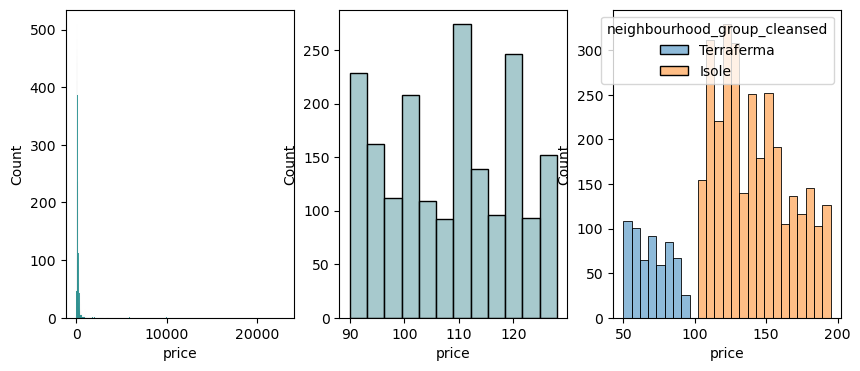

In [221]:
plt.style.use('default')
plt.rcParams["figure.figsize"] = (10,4)

fig, axs = plt.subplots(ncols=3)
sns.histplot(x = 'price' , color='teal', data = Vdf, ax=axs[0])
sns.histplot(x = 'price' , color='#8ab8bd', data = IQR_df, ax=axs[1])
sns.histplot(x = 'price' , hue = 'neighbourhood_group_cleansed', data = Both_df, ax=axs[2])
print("Before Removing Outliers   ~~~~~   Pre-Split IQR of Price   ~~~~~   Post-Split, IQR-Adjusted Price of Listings")

We can see the value in having split the dataset into two groups before bounding price with IQR by viewing the 3-step timeline above.
> The observations of price become more normally-distributed (more "bell-shaped") after splitting two populations.

In [158]:
# exporting csv for Tableau viz of maps
Vdf.dropna().to_csv('airbnb_Venice_nonullscores.csv')
Vdf.to_csv('airbnb_Venice_yesnulls.csv')

In [168]:
# Isole vs Mainland review scores
pd.pivot_table(Both_df, index='neighbourhood_group_cleansed', values='review_scores_rating', aggfunc = ('mean', 'count'))

,count,mean
neighbourhood_group_cleansed,,
Isole,2840,4.707137
Terraferma,562,4.679875


Island $(Isole)$ neighbourhoods score higher on reviews and has the most listings by far, so we will focus on Island-located listings only!

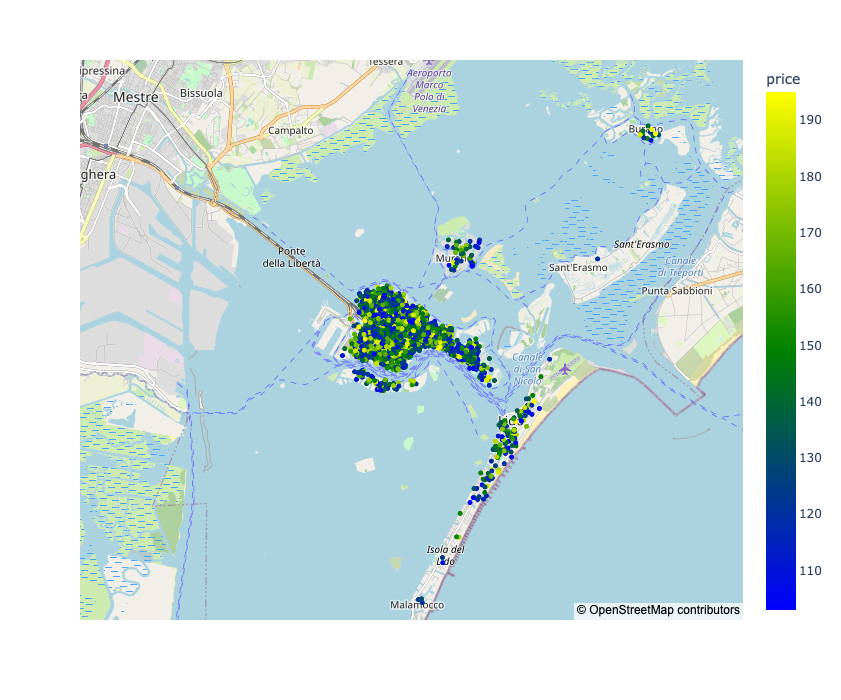

In [178]:
# let's try a map of those listings

import plotly.express as px
color_scale = [(0, 'blue'), (0.5, 'green'), (1,'yellow')]
fig = px.scatter_mapbox(Isole_df,
                        lat="latitude",
                        lon="longitude",
                        hover_name="price",
                        hover_data=["room_type", "review_scores_rating", "review_scores_value", "review_scores_location"],
                        color="price", 
                        color_continuous_scale=color_scale,
                        zoom=11,
                        height=700,
                        width=900)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

# using price to color the map doesn't show any clusters of interest, but it does help us see some solitary locations with high reviews

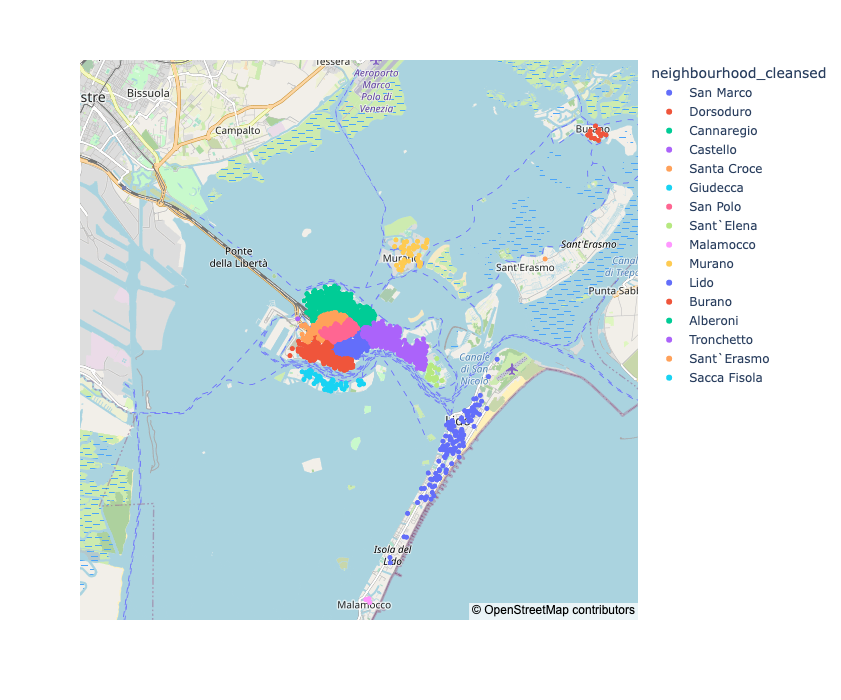

In [182]:
# let's try a map of those listings

import plotly.express as px
color_scale = [(0, 'blue'), (0.5, 'green'), (1,'yellow')]
fig = px.scatter_mapbox(Isole_df,
                        lat="latitude",
                        lon="longitude",
                        hover_name="neighbourhood_cleansed",
                        hover_data=["price", "review_scores_rating"],
                        color="neighbourhood_cleansed", 
                        color_continuous_scale=color_scale,
                        zoom=11,
                        height=700,
                        width=800)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [ ]:
# Cannaregio, Castello, & San Marco have the most listings available.
# San Polo, Santa Croce, Dorsoduro, & Lido have a fair amount of listings as well. 


# apparently, people are usually pretty happy with location wherever they stay whenever they stay in Venice.
# Except for the neighborhood Alberoni, which is noticeably farther from all attractions than the other neighbourhoods.

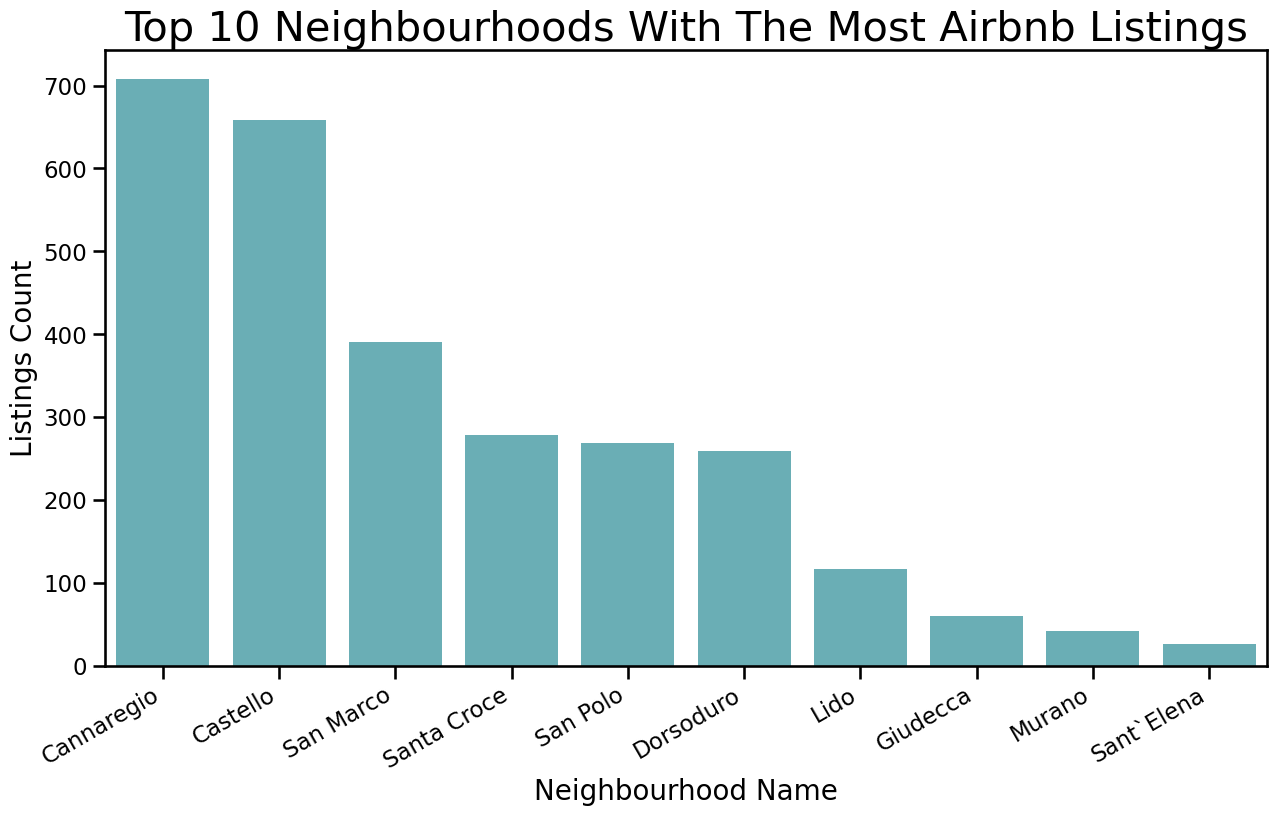

In [220]:
# Which ten neighbourhoods have the most listings to choose from?
avgscore_listing = Isole_df.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=False).reset_index()
TOPctscore_listing = Isole_df.groupby(['neighbourhood_cleansed'])['review_scores_rating'].count().sort_values(ascending=False).reset_index()
LOWctscore_listing = Isole_df.groupby(['neighbourhood_cleansed'])['review_scores_rating'].count().sort_values(ascending=True).reset_index()
# using review count to only include verified/reviewed listings

plt.figure(figsize=(15,8))
ax = sns.barplot(data = TOPctscore_listing.sort_values('review_scores_rating', ascending=False).head(10), 
            x = 'neighbourhood_cleansed', y = 'review_scores_rating', color = '#5db8c2')

#Adding a title and labels. 
plt.xticks(rotation=30, ha='right')
plt.title('Top 10 Neighbourhoods With The Most Airbnb Listings', size=30)
plt.ylabel('Listings Count', size=20)
plt.xlabel('Neighbourhood Name', size=20)
plt.show()

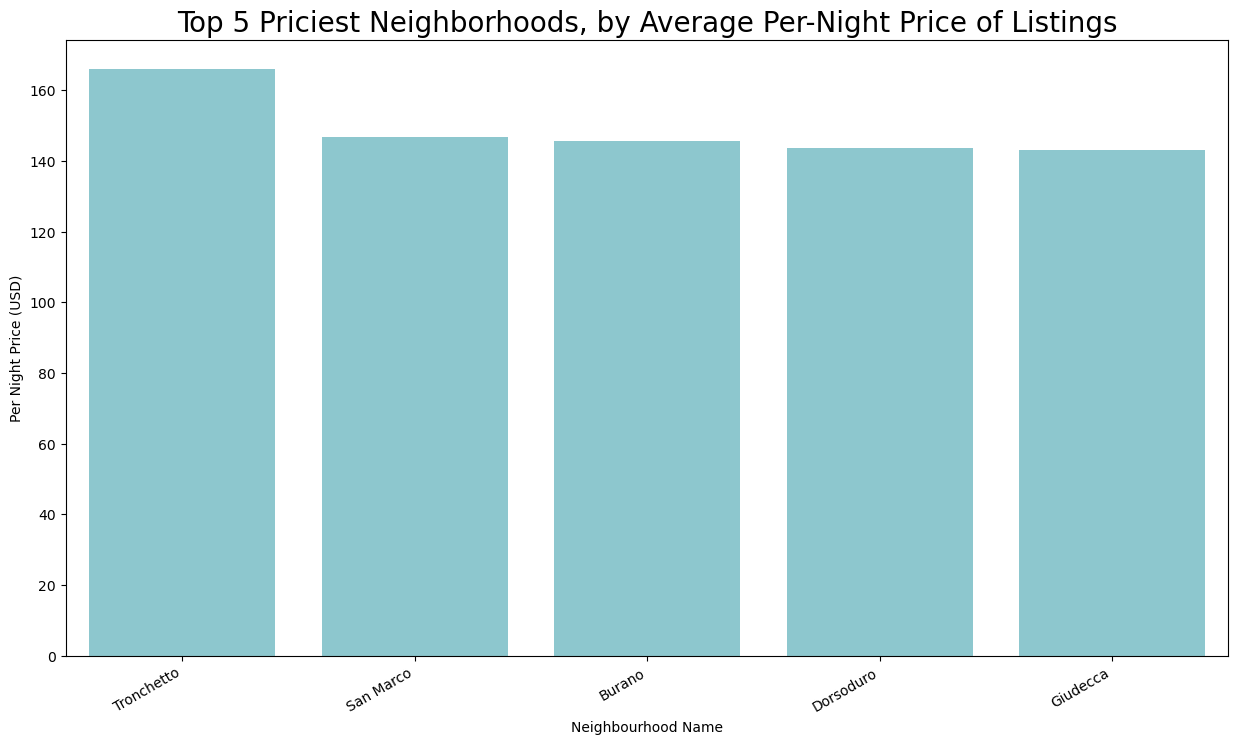

In [223]:
# Which neighborhoods have most expensive listings?
avgprice_listing = Isole_df.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,8))
ax = sns.barplot(data = avgprice_listing.sort_values('price', ascending=False).head(5),
                 x = 'neighbourhood_cleansed', y = 'price', color = '#82d0d9')

#Adding a title and labels
plt.xticks(rotation=30, ha='right')
plt.title('Top 5 Priciest Neighborhoods, by Average Per-Night Price of Listings', size=30)
plt.ylabel('Per Night Price (USD)', size=20)
plt.xlabel('Neighbourhood Name', size=20)
plt.show()

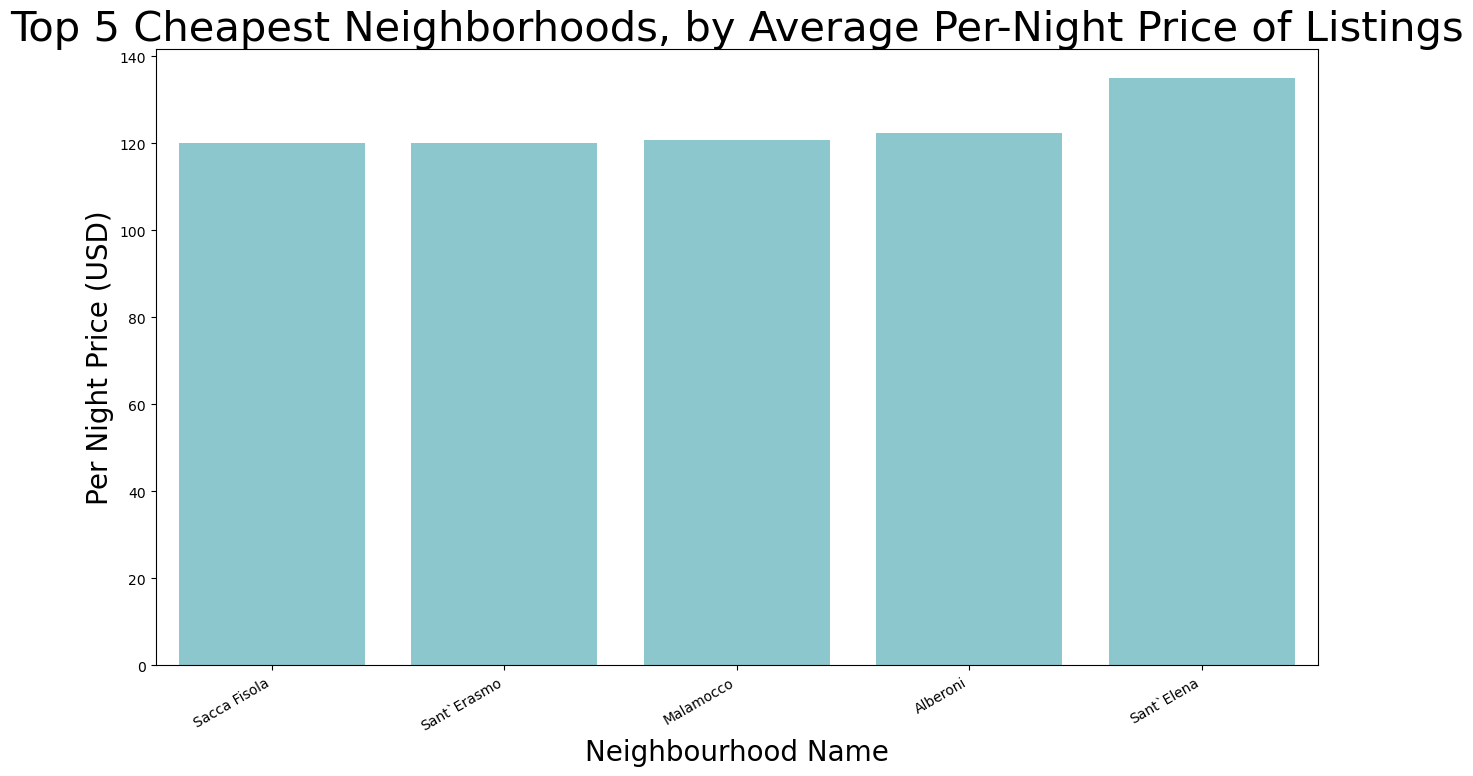

In [226]:
# Which neighborhoods have least expensive listings?
avgprice_listing = Isole_df.groupby(['neighbourhood_cleansed'])['price'].mean().sort_values(ascending=True).reset_index()

plt.figure(figsize=(15,8))
ax = sns.barplot(data = avgprice_listing.sort_values('price', ascending=True).head(5),
                 x = 'neighbourhood_cleansed', y = 'price', color='#82d0d9')

#Adding a title and labels
plt.xticks(rotation=30, ha='right')
plt.title('Top 5 Cheapest Neighborhoods, by Average Per-Night Price of Listings', size=30)
plt.ylabel('Per Night Price (USD)', size=20)
plt.xlabel('Neighbourhood Name', size=20)
plt.show()

In [230]:
# Which neighborhoods stick out for "value", which is the most important metric used to score overall?

# To me, Value = Max Happy Customers + Min Price

# Let's use the difference between Mean & Median of price to measure "skew" - 
# since we've already removed price outliers from dataset, we will identify where median < mean 
# and interpret that locale to have extra listings priced below average. 
    # Median - Mean = negative numbers when mean is more than median.
    # (Also possible that one high-priced outlier within the range is skewing mean upwards.)

# including Count to check sample size of neighbourhood

In [231]:
where_pvt = Isole_df.pivot_table(index = 'neighbourhood_cleansed', values = 'price', aggfunc = ('count','min','max', 'mean','median'))
where_pvt['skew_medmean'] = where_pvt['median'] - where_pvt['mean']
where_pvt = where_pvt.sort_values('skew_medmean', ascending = True)
where_pvt

,count,max,mean,median,min,skew_medmean
neighbourhood_cleansed,,,,,,
Sant`Elena,26,192.0,134.884615,123.5,103.0,-11.384615
Santa Croce,292,195.0,141.154110,135.0,103.0,-6.154110
Murano,43,190.0,138.279070,133.0,103.0,-5.279070
Lido,125,195.0,138.736000,135.0,104.0,-3.736000
Dorsoduro,282,195.0,143.627660,140.0,104.0,-3.627660
Giudecca,66,195.0,142.984848,139.5,105.0,-3.484848
Cannaregio,772,195.0,140.852332,137.5,103.0,-3.352332
Castello,697,195.0,140.010043,137.0,103.0,-3.010043
Burano,17,193.0,145.588235,143.0,110.0,-2.588235


In [245]:
# Identify the neighborhood Sant`Elena as having the most low-priced listings despite a max price in the mid-/low-range 
# Although Sant`Elena has merely 26 listings, the other neighborhoods with < 50 listings don't compare.

Best_df = Isole_df.query('neighbourhood_cleansed == """Sant`Elena""" ')
Best_df = Best_df.sort_values(['price'], ascending = False)
Best_df['price']

5327    192.0
3539    189.0
7241    179.0
6472    170.0
2272    170.0
366     150.0
2302    150.0
4589    144.0
3247    141.0
5845    137.0
3373    135.0
7259    134.0
2180    124.0
749     123.0
2882    120.0
2963    120.0
2109    120.0
316     120.0
2718    118.0
2237    116.0
6601    114.0
6602    114.0
1826    110.0
58      110.0
1505    104.0
70      103.0
Name: price, dtype: float64

In [247]:
# we see a few high outliers clustered above $180 but many options priced at or below $150 per night

# let's confirm the reviews are usually happy

Best_df = Best_df.sort_values(['review_scores_rating'], ascending = False)
Best_df['review_scores_rating']

5327    5.00
7259    5.00
3373    5.00
2302    5.00
4589    5.00
3247    4.95
2109    4.95
3539    4.93
316     4.93
2963    4.92
1826    4.91
2272    4.88
6602    4.86
6601    4.85
2718    4.84
366     4.84
2237    4.84
7241    4.82
70      4.72
2882    4.71
749     4.58
2180    4.27
5845    4.00
1505    3.78
58      3.00
6472    1.00
Name: review_scores_rating, dtype: float64

In [262]:
# we notice a single 1-star review and match the index to previous list of prices - the listing reviewed 1.0 is priced at 170
# if we exclude high priced units anyways (seeking value, minimizing risk of poor guest expeience) then we can eliminate the risky unit and trust the remaining listings to deliver a positive experience

Best_df = Isole_df.query('neighbourhood_cleansed == """Sant`Elena""" ')

Best_df = Best_df[(Best_df['review_scores_rating'] > 4.0)]

Best_df = Best_df[(Best_df['price'] <= 160)]

Best_df.count()

id                              18
host_id                         18
host_name                       18
host_listings_count             18
host_total_listings_count       18
neighbourhood_cleansed          18
neighbourhood_group_cleansed    18
latitude                        18
longitude                       18
property_type                   18
room_type                       18
price                           18
number_of_reviews               18
review_scores_rating            18
review_scores_accuracy          18
review_scores_cleanliness       18
review_scores_checkin           18
review_scores_communication     18
review_scores_location          18
review_scores_value             18
commercial_boolean              18
all_cnt                         18
entire_home_cnt                 18
private_rooms_cnt               18
shared_room_cnt                 18
dtype: int64

In [263]:
# 18 listings remain

Best_df.pivot_table(index = 'room_type', values = 'price', aggfunc = ('count', 'median'))

,count,median
room_type,,
Entire home/apt,14,121.5
Hotel room,2,114.0
Private room,2,127.5


In [264]:
# 2 inexpensive hotel rooms, 2 private rooms in shared residence, and 14 unshared residences.

In [268]:
# what if we repeat skew chart with > $170 price listings filtered out
# what if we repeat skew chart with > $160 price listings filtered out
round2 = Isole_df[(Isole_df['price'] <= 160)]
round2_pvt = round2.pivot_table(index = 'neighbourhood_cleansed', values = 'price', aggfunc = ('count','min','max', 'mean','median'))
round2_pvt['skew_medmean'] = round2_pvt['median'] - round2_pvt['mean']
round2_pvt = round2_pvt.sort_values('skew_medmean', ascending = True)
round2_pvt

    # filtering out prices above 160 doesn't change neighborhood ranking list - I'm sticking with this metric.

,count,max,mean,median,min,skew_medmean
neighbourhood_cleansed,,,,,,
Sant`Elena,21,150.0,124.142857,120.0,103.0,-4.142857
Santa Croce,220,160.0,129.390909,127.0,103.0,-2.390909
Lido,101,160.0,128.752475,127.0,104.0,-1.752475
San Marco,295,160.0,133.227119,132.0,104.0,-1.227119
San Polo,217,160.0,130.078341,129.0,103.0,-1.078341
Dorsoduro,208,160.0,131.004808,130.0,104.0,-1.004808
Giudecca,48,160.0,130.291667,129.5,105.0,-0.791667
Castello,545,160.0,129.623853,129.0,103.0,-0.623853
Alberoni,32,145.0,120.468750,120.0,110.0,-0.468750


In [282]:
inner_join = pd.merge(Best_df, 
                      venice_df, 
                      on ='id', 
                      how ='inner')
inner_join['listing_url']

# used urls listed in original CSV file to create list of recommended Airbnb listings to check out:

0                 https://www.airbnb.com/rooms/335961
1                https://www.airbnb.com/rooms/2429764
2                https://www.airbnb.com/rooms/2805609
3                https://www.airbnb.com/rooms/5935593
4               https://www.airbnb.com/rooms/16068452
5               https://www.airbnb.com/rooms/18443529
6               https://www.airbnb.com/rooms/19006935
7               https://www.airbnb.com/rooms/19669173
8               https://www.airbnb.com/rooms/20226504
9               https://www.airbnb.com/rooms/23635043
10              https://www.airbnb.com/rooms/24744427
11              https://www.airbnb.com/rooms/25285290
12              https://www.airbnb.com/rooms/28073916
13              https://www.airbnb.com/rooms/29552142
14              https://www.airbnb.com/rooms/41876488
15                https://www.airbnb.com/rooms/776996
16                https://www.airbnb.com/rooms/783211
17    https://www.airbnb.com/rooms/665750835335936544
Name: listing_url, dtype: ob

### 
### Having filtered over 7,000 listings down to 18 recommendations, I am done for now. 

### Hope your travel dates work with one of the availability of these 18 recommended listings!


<img src="img/Slide1.png" width=550/>
